In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from scipy.stats import linregress

In [2]:
dog_data = pd.read_csv('dog_rates_tweets.csv', parse_dates=[1])

In [3]:
rating_data = dog_data['text'].str.extract(r'(\d+(\.\d+)?)/10')
rating_data = rating_data[0].astype(float)
dog_data['rating'] = rating_data
dog_data = dog_data.dropna()
dog_data = dog_data[dog_data['rating']<=25]

In [4]:
def to_timestamp(date):
    return date.timestamp()

In [5]:
def get_year(date):
    return date.year

In [6]:
dog_data['timestamp'] = dog_data['created_at'].apply(to_timestamp)
dog_data['year'] = dog_data['created_at'].apply(get_year)
fit = linregress(dog_data['timestamp'].values, dog_data['rating'].values)

In [7]:
dog_data['prediction'] = fit.intercept + fit.slope*dog_data['timestamp'].values
dog_year_avg = dog_data.groupby('year').agg({'rating': 'mean'})

In [8]:
dog_data

,id,created_at,text,rating,timestamp,year,prediction
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0,1.525910e+09,2018,13.185763
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13.0,1.525797e+09,2018,13.181785
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0,1.525735e+09,2018,13.179609
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13.0,1.525394e+09,2018,13.167614
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13.0,1.525285e+09,2018,13.163804
...,...,...,...,...,...,...,...
7363,1032725635888803841,2018-08-23 20:25:53,This is Noodles. He had brain surgery earlier ...,14.0,1.535056e+09,2018,13.507338
7369,1032310288652152832,2018-08-22 16:55:26,This is Pingo and Nina. They are believed to b...,14.0,1.534957e+09,2018,13.503856
7381,1031696422813544448,2018-08-21 00:16:09,This is Nikita. She got caught in some wild fl...,13.0,1.534811e+09,2018,13.498710
7431,1029767403545288706,2018-08-15 16:30:55,This is Winston. He came home for the first ti...,14.0,1.534351e+09,2018,13.482540


In [9]:
dog_year_avg

,rating
year,
2016,11.016244
2017,12.563051
2018,12.858974
2019,13.131579


In [10]:
fit.slope, fit.intercept

(3.5159299748477226e-08, -40.46415480898918)

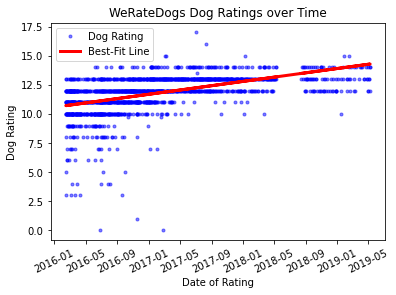

<Figure size 1944x1080 with 0 Axes>

In [11]:
plt.xticks(rotation=25)
plt.xlabel('Date of Rating')
plt.ylabel('Dog Rating')
plt.title('WeRateDogs Dog Ratings over Time')
plt.plot(dog_data['created_at'].values, dog_data['rating'].values, 'b.', alpha=0.5)
plt.plot(dog_data['created_at'].values, dog_data['prediction'].values, 'r-', linewidth=3)
plt.legend(['Dog Rating', 'Best-Fit Line'])
plt.figure(figsize=(27, 15))
plt.show()

In [12]:
print(fit.pvalue)

1.5139606492959894e-106


In [13]:
residuals = dog_data['rating'] - (fit.slope*dog_data['timestamp'] + fit.intercept)
print(residuals)

2       0.814237
7      -0.181785
8       0.820391
24     -0.167614
30     -0.163804
          ...   
7363    0.492662
7369    0.496144
7381   -0.498710
7431    0.517460
7433   -0.480725
Length: 1669, dtype: float64


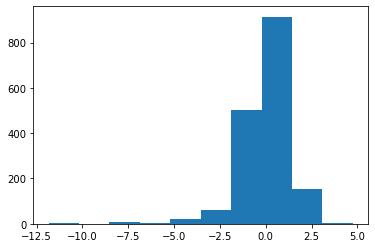

In [14]:
plt.hist(residuals)
plt.show()

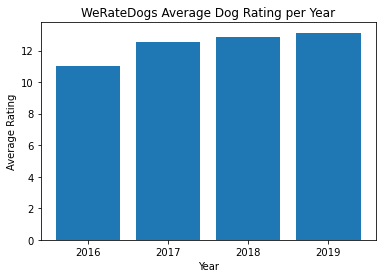

In [16]:
plt.bar(['2016', '2017', '2018', '2019'], dog_year_avg['rating'])
plt.ylabel('Average Rating')
plt.xlabel('Year')
plt.title('WeRateDogs Average Dog Rating per Year')
plt.show()